Accuracy Score 0.09333333333333334
Confusion Matrix [[ 0 50  0]
 [ 2  0 48]
 [36  0 14]]


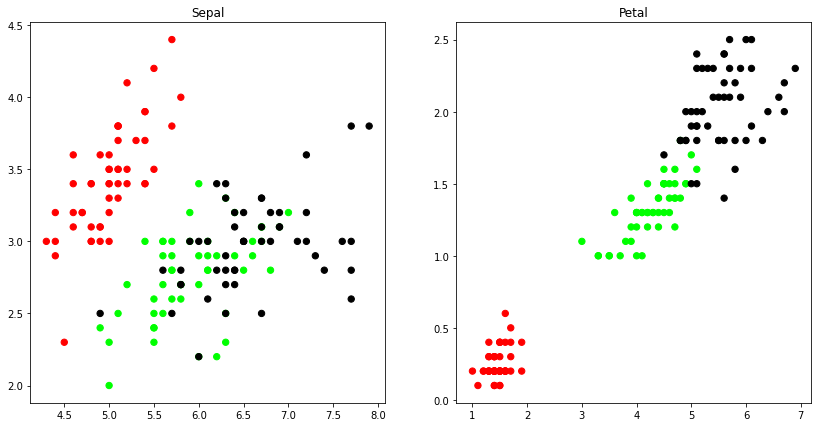

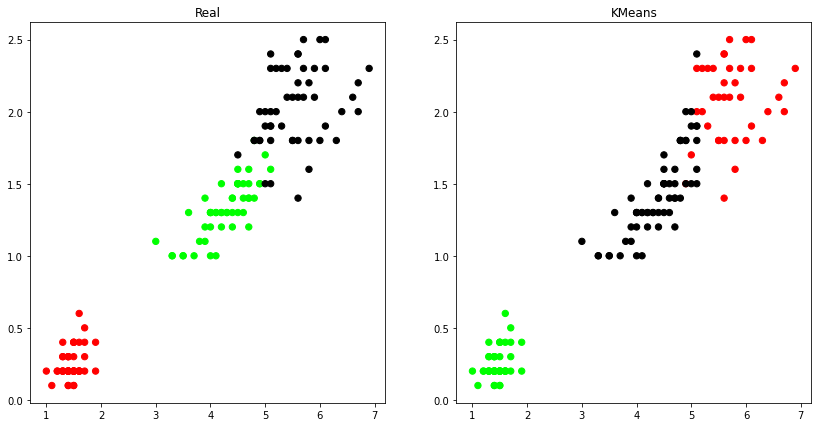

In [12]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,2,1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c= colormap[y.Targets], s= 40)
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s= 40)
plt.title('Petal')

model = KMeans(n_clusters = 3)
model.fit(x)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s = 40)
plt.title('Real')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[model.labels_], s=40)
plt.title('KMeans')

print('Accuracy Score', accuracy_score(y.Targets, model.labels_))
print('Confusion Matrix', confusion_matrix(y.Targets, model.labels_))

Accracy Score: 0.9666666666666667
Confusion Matrix [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


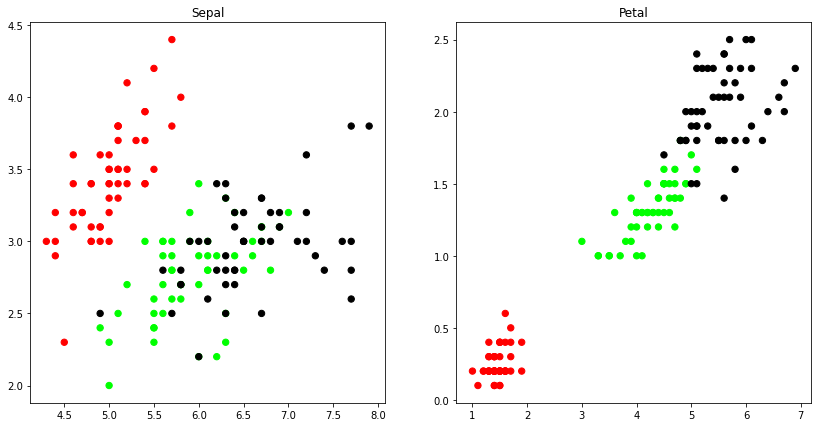

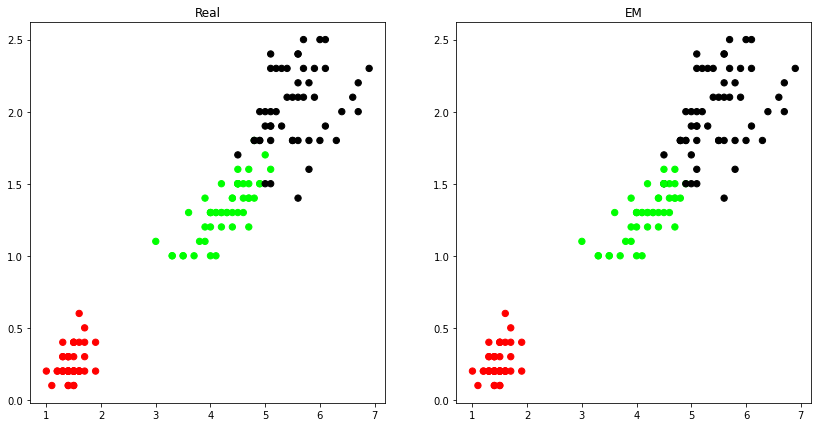

In [27]:
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture

iris = datasets.load_iris()
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,2,1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c= colormap[y.Targets], s=40)
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s= 40)
plt.title('Petal')

scaler = preprocessing.StandardScaler()
scaler.fit(x)
xsa = scaler.transform(x)
xs = pd.DataFrame(xsa, columns = x.columns)

gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)
y_gmm = gmm.predict(xs)

plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(1,2,1)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y.Targets], s= 40)
plt.title('Real')

plt.subplot(1,2,2)
plt.scatter(x.Petal_Length, x.Petal_Width, c = colormap[y_gmm], s= 40)
plt.title('EM')

print("Accracy Score:" , accuracy_score(y.Targets, y_gmm))
print("Confusion Matrix", confusion_matrix(y.Targets, y_gmm))